<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.221093,51.573504,24.326753,7.075314,181.196664,174.626806,6.569858
1,0.0,1.0,72.154036,85.693612,99.552111,4.108938,271.508697,266.598371,4.910326
2,0.0,2.0,43.592791,68.471220,81.442624,-2.079963,201.426672,202.636110,-1.209438
3,0.0,3.0,95.893327,64.466250,45.616289,-11.853943,204.121923,216.257703,-12.135780
4,0.0,4.0,28.433556,25.734638,28.179286,2.445549,94.793029,92.204290,2.588739
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,35.596755,75.127184,36.185592,5.289682,162.199213,157.472511,4.726702
119996,999.0,116.0,25.425058,78.410020,58.789735,-4.056361,168.568451,172.418812,-3.850361
119997,999.0,117.0,23.406825,53.225433,49.195339,-6.898820,128.928777,136.050294,-7.121517
119998,999.0,118.0,35.251557,90.571752,56.442834,-0.733031,191.533113,192.125312,-0.592199


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.221093,51.573504,24.326753,7.075314,181.196664,174.626806,6.569858
1,0.0,1.0,72.154036,85.693612,99.552111,4.108938,271.508697,266.598371,4.910326
2,0.0,2.0,43.592791,68.471220,81.442624,-2.079963,201.426672,202.636110,-1.209438
3,0.0,3.0,95.893327,64.466250,45.616289,-11.853943,204.121923,216.257703,-12.135780
4,0.0,4.0,28.433556,25.734638,28.179286,2.445549,94.793029,92.204290,2.588739
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,35.596755,75.127184,36.185592,5.289682,162.199213,157.472511,4.726702
119996,999.0,116.0,25.425058,78.410020,58.789735,-4.056361,168.568451,172.418812,-3.850361
119997,999.0,117.0,23.406825,53.225433,49.195339,-6.898820,128.928777,136.050294,-7.121517
119998,999.0,118.0,35.251557,90.571752,56.442834,-0.733031,191.533113,192.125312,-0.592199


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    88.221093  51.573504  24.326753  ...  181.196664  174.626806   6.569858
      1.0    72.154036  85.693612  99.552111  ...  271.508697  266.598371   4.910326
      2.0    43.592791  68.471220  81.442624  ...  201.426672  202.636110  -1.209438
      3.0    95.893327  64.466250  45.616289  ...  204.121923  216.257703 -12.135780
      4.0    28.433556  25.734638  28.179286  ...   94.793029   92.204290   2.588739
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  35.596755  75.127184  36.185592  ...  162.199213  157.472511   4.726702
      116.0  25.425058  78.410020  58.789735  ...  168.568451  172.418812  -3.850361
      117.0  23.406825  53.225433  49.195339  ...  128.928777  136.050294  -7.121517
      118.0  35.251557  90.571752  56.442834  ...  191.533113  192.125312  -0.592199
      119.0  61.562496  85.266019  38.231856  ...  194.636794  195.685751  -1.048957

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    88.221093  51.573504  24.326753  ...  181.196664  174.626806   6.569858
      1.0    72.154036  85.693612  99.552111  ...  271.508697  266.598371   4.910326
      2.0    43.592791  68.471220  81.442624  ...  201.426672  202.636110  -1.209438
      3.0    95.893327  64.466250  45.616289  ...  204.121923  216.257703 -12.135780
      4.0    28.433556  25.734638  28.179286  ...   94.793029   92.204290   2.588739
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  35.596755  75.127184  36.185592  ...  162.199213  157.472511   4.726702
      116.0  25.425058  78.410020  58.789735  ...  168.568451  172.418812  -3.850361
      117.0  23.406825  53.225433  49.195339  ...  128.928777  136.050294  -7.121517
      118.0  35.251557  90.571752  56.442834  ...  191.533113  192.125312  -0.592199
      119.0  61.562496  85.266019  38.231856  ...  194.636794  195.685751  -1.048957

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.221093,51.573504,24.326753,7.075314,181.196664,174.626806,6.569858
1,0.0,1.0,72.154036,85.693612,99.552111,4.108938,271.508697,266.598371,4.910326
2,0.0,2.0,43.592791,68.471220,81.442624,-2.079963,201.426672,202.636110,-1.209438
3,0.0,3.0,95.893327,64.466250,45.616289,-11.853943,204.121923,216.257703,-12.135780
4,0.0,4.0,28.433556,25.734638,28.179286,2.445549,94.793029,92.204290,2.588739
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,35.596755,75.127184,36.185592,5.289682,162.199213,157.472511,4.726702
119996,999.0,116.0,25.425058,78.410020,58.789735,-4.056361,168.568451,172.418812,-3.850361
119997,999.0,117.0,23.406825,53.225433,49.195339,-6.898820,128.928777,136.050294,-7.121517
119998,999.0,118.0,35.251557,90.571752,56.442834,-0.733031,191.533113,192.125312,-0.592199


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    88.221093  51.573504  24.326753  ...  181.196664  174.626806   6.569858
      1.0    72.154036  85.693612  99.552111  ...  271.508697  266.598371   4.910326
      2.0    43.592791  68.471220  81.442624  ...  201.426672  202.636110  -1.209438
      3.0    95.893327  64.466250  45.616289  ...  204.121923  216.257703 -12.135780
      4.0    28.433556  25.734638  28.179286  ...   94.793029   92.204290   2.588739
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  35.596755  75.127184  36.185592  ...  162.199213  157.472511   4.726702
      116.0  25.425058  78.410020  58.789735  ...  168.568451  172.418812  -3.850361
      117.0  23.406825  53.225433  49.195339  ...  128.928777  136.050294  -7.121517
      118.0  35.251557  90.571752  56.442834  ...  191.533113  192.125312  -0.592199
      119.0  61.562496  85.266019  38.231856  ...  194.636794  195.685751  -1.048957

[120000 rows x 7 columns]

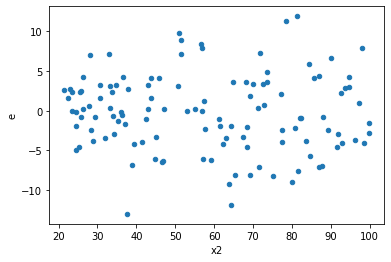

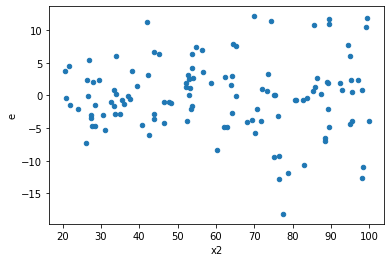

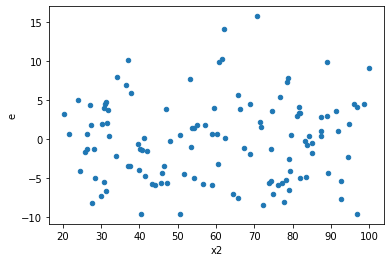

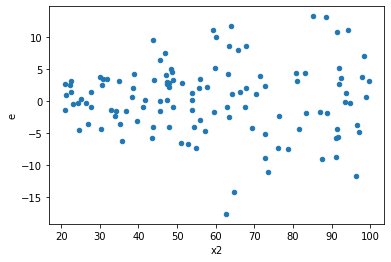

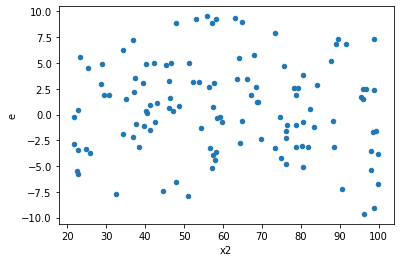

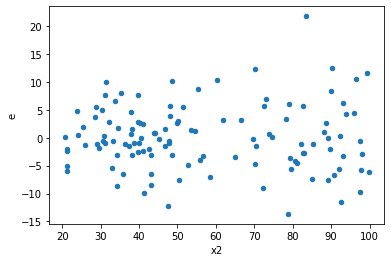

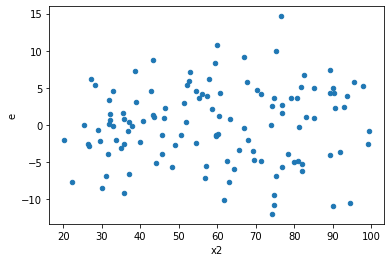

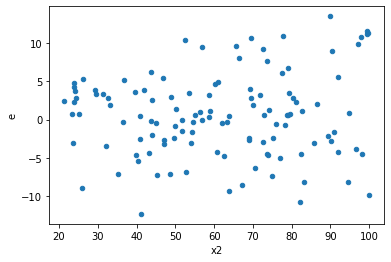

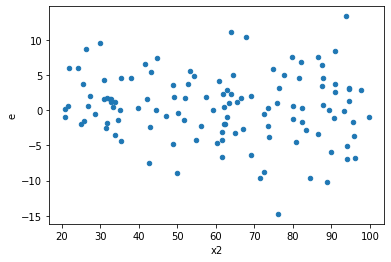

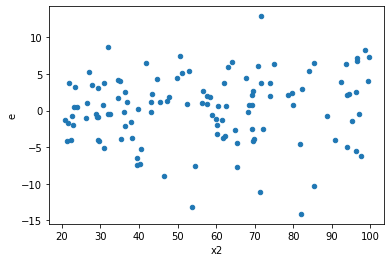

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,573.5024140661851,1199.4546567514958,12.744498090359668,26.654547927811016,2.091455288299924,0.014924402471514275,0.9925377987642429,0.007462201235757138,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,646.7888598478412,2144.385594925421,14.37308577439647,47.653013220564915,3.315433718864443,0.00010120613708042292,0.9999493969314598,5.060306854021146e-05,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,911.1760140014419,1362.1820496027872,20.24835586669871,30.27071221339527,1.4949713652148788,0.1812930337647427,0.9093534831176286,0.09064651688237135,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,487.0683212310563,1885.9727338117607,10.823740471801251,41.9105051958169,3.8720907347145856,1.3014570189762154e-05,0.9999934927149051,6.507285094881077e-06,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,792.2617463776924,833.5200617925715,17.605816586170942,18.522668039834922,1.0520766219037037,0.8655434876995649,0.5672282561502175,0.43277174384978245,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,945.2011608944797,2202.552900507553,21.00447024209955,48.94562001127896,2.3302477733133484,0.005410257585747313,0.9972948712071263,0.0027051287928736567,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,722.3684196745646,1641.715871523012,16.052631548323657,36.482574922733605,2.2726849995223,0.006903023239578587,0.9965484883802107,0.0034515116197892937,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,901.9411542363583,1790.6794577010403,20.04313676080796,39.7928768378009,1.9853617381692106,0.023464426538940097,0.98826778673053,0.011732213269470049,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,606.4756289836452,1436.7267012878792,13.47723619963656,31.92726002861954,2.3689768106520623,0.004594322734355005,0.9977028386328225,0.0022971613671775026,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,573.5024140661851,1199.4546567514958,12.744498090359668,26.654547927811016,2.091455288299924,0.014924402471514275,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,646.7888598478412,2144.385594925421,14.37308577439647,47.653013220564915,3.315433718864443,0.00010120613708042292,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,911.1760140014419,1362.1820496027872,20.24835586669871,30.27071221339527,1.4949713652148788,0.1812930337647427,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,487.0683212310563,1885.9727338117607,10.823740471801251,41.9105051958169,3.8720907347145856,1.3014570189762154e-05,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,792.2617463776924,833.5200617925715,17.605816586170942,18.522668039834922,1.0520766219037037,0.8655434876995649,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,945.2011608944797,2202.552900507553,21.00447024209955,48.94562001127896,2.3302477733133484,0.005410257585747313,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,722.3684196745646,1641.715871523012,16.052631548323657,36.482574922733605,2.2726849995223,0.006903023239578587,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,901.9411542363583,1790.6794577010403,20.04313676080796,39.7928768378009,1.9853617381692106,0.023464426538940097,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,606.4756289836452,1436.7267012878792,13.47723619963656,31.92726002861954,2.3689768106520623,0.004594322734355005,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      640
Reject001=0 : Heteroscedasticity    360
Name: Result_test, dtype: int64